In [9]:
#Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)

Loading in Dataset...

In [2]:
df = pd.read_parquet('C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/FimaNfipClaims.parquet.gzip')

In [3]:
df.head()

,agricultureStructureIndicator,asOfDate,basementEnclosureCrawlspaceType,policyCount,crsClassificationCode,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,baseFloodElevation,ratedFloodZone,houseWorship,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,primaryResidenceIndicator,buildingDamageAmount,buildingDeductibleCode,netBuildingPaymentAmount,buildingPropertyValue,causeOfDamage,condominiumCoverageTypeCode,contentsDamageAmount,contentsDeductibleCode,netContentsPaymentAmount,contentsPropertyValue,disasterAssistanceCoverageRequired,eventDesignationNumber,ficoNumber,floodCharacteristicsIndicator,floodWaterDuration,floodproofedIndicator,floodEvent,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityNumberCurrent,nfipCommunityName,nonPaymentReasonContents,nonPaymentReasonBuilding,numberOfUnits,buildingReplacementCost,contentsReplacementCost,replacementCostBasis,stateOwnedIndicator,waterDepth,floodZoneCurrent,buildingDescriptionCode,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id
0,0,2020-01-22T16:55:53.194Z,NaN,1,8.0,1998-02-07T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,4.0,0,10.0,1.0,1963-01-01T00:00:00.000Z,1997-01-11T00:00:00.000Z,NaN,NaN,NaN,0,7,0,200000.0,50000.0,1998,0,382.0,0,0.00,937.0,1,N,NaN,0,0.0,NaN,0.0,None,612.0,NaN,0.0,0,Pineapple Express - Southern,15000.0,0.0,60294.0,None,"OCEANSIDE, CITY OF",97.0,1.0,1.0,937.0,NaN,A,0,0.0,None,NaN,0,CA,Currently Unavailable,92056.0,6073.0,6.073019e+09,6.073019e+10,33.2,-117.3,23dcb0d8-3e61-45bf-899f-b951946ce2ff
1,0,2020-01-22T16:55:53.194Z,NaN,1,8.0,2005-08-29T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,2.0,0,NaN,1.0,1967-07-01T00:00:00.000Z,1990-07-12T00:00:00.000Z,NaN,NaN,NaN,0,7,0,100000.0,40000.0,2005,1,NaN,0,0.00,NaN,1,N,NaN,0,0.0,NaN,0.0,None,654.0,NaN,0.0,0,Hurricane Katrina,30000.0,0.0,225203.0,None,NEW ORLEANS/ORLEANS PARISH*,6.0,6.0,1.0,NaN,NaN,A,0,0.0,None,NaN,0,LA,Currently Unavailable,70131.0,22071.0,2.207100e+10,2.207100e+11,29.9,-90.0,55783cdd-ccbd-4b19-930b-072def248507
2,0,2020-01-22T16:55:53.194Z,NaN,1,9.0,1998-09-28T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,1.0,0,10.0,1.0,1972-01-01T00:00:00.000Z,1997-07-24T00:00:00.000Z,8813.21,1720.0,0.0,0,1,0,100000.0,50000.0,1998,1,9313.0,0,8813.21,80000.0,1,N,2220.0,0,1720.0,0.0,0.0,None,133.0,NaN,0.0,0,Hurricane Georges (Panhandle),15000.0,0.0,120274.0,None,SANTA ROSA COUNTY *,NaN,NaN,1.0,100000.0,0.0,A,0,0.0,None,NaN,0,FL,Currently Unavailable,32566.0,12113.0,1.211301e+10,1.211301e+11,30.4,-86.9,bfb5922b-1b21-4882-b1d4-b3825ff53e37
3,0,2019-09-19T13:45:58.425Z,1.0,1,9.0,1994-10-07T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,2.0,0,10.0,1.0,1960-01-01T00:00:00.000Z,1993-10-01T00:00:00.000Z,2906.00,0.0,0.0,0,7,0,100000.0,25000.0,1994,0,4428.0,0,2906.00,100000.0,1,N,NaN,0,0.0,NaN,0.0,None,NaN,NaN,0.0,0,None,NaN,0.0,450026.0,None,"BEAUFORT, CITY OF",97.0,NaN,1.0,0.0,NaN,A,0,0.0,None,NaN,0,SC,Currently Unavailable,29902.0,45013.0,4.501300e+10,4.501300e+11,32.4,-80.7,c1cf6e00-1e6d-4493-93fc-eb430ef15495
4,0,2019-09-19T13:45:58.425Z,NaN,1,8.0,1996-03-11T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,1.0,0,NaN,1.0,1988-01-01T00:00:00.000Z,1996-01-11T00:00:00.000Z,3875.53,1545.0,0.0,1,7,0,100000.0,25000.0,1996,1,5252.0,0,3875.53,100000.0,1,N,3115.0,0,1545.0,0.0,0.0,None,NaN,NaN,0.0,0,None,NaN,0.0,125092.0,None,BREVARD COUNTY *,NaN,NaN,1.0,0.0,0.0,A,0,0.0,None,1.0,0,FL,Currently Unavailable,32940.0,12009.0,1.200906e+10,1.200906e+11,28.3,-80.7,cad8334c-13f2-4837-bdcf-e09591197ff7


In [4]:
df.columns

Index(['agricultureStructureIndicator', 'asOfDate',
       'basementEnclosureCrawlspaceType', 'policyCount',
       'crsClassificationCode', 'dateOfLoss', 'elevatedBuildingIndicator',
       'elevationCertificateIndicator', 'elevationDifference',
       'baseFloodElevation', 'ratedFloodZone', 'houseWorship',
       'locationOfContents', 'lowestAdjacentGrade', 'lowestFloorElevation',
       'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
       'obstructionType', 'occupancyType', 'originalConstructionDate',
       'originalNBDate', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod',
       'smallBusinessIndicatorBuilding', 'totalBuildingInsuranceCoverage',
       'totalContentsInsuranceCoverage', 'yearOfLoss',
       'primaryResidenceIndicator', 'buildingDamageAmount',
       'buildingDeductibleCode', 'netBuildingPaymentAmount',
       'buildingPropertyValu

In [78]:
df_visuals = df[['elevationDifference', 'waterDepth']].dropna().drop_duplicates()

In [79]:
df_visuals = df_visuals[(df_visuals['elevationDifference']>-25) & (df_visuals['elevationDifference'] < 120)]
df_visuals['elevationDifference'] = abs(df_visuals['elevationDifference'])

In [80]:
df_visuals = df_visuals[(df_visuals['waterDepth'] < 20) & (df_visuals['waterDepth'] > -10)]

In [81]:
df_visuals['elevationDifference'].corr(df_visuals['waterDepth'])

-0.13004642654056062

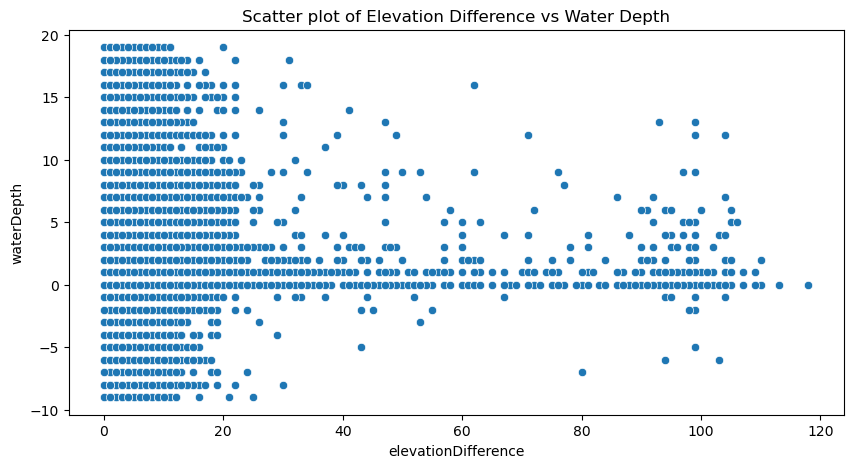

In [82]:
# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_visuals, x='elevationDifference', y='waterDepth')
plt.title('Scatter plot of Elevation Difference vs Water Depth')
plt.show()

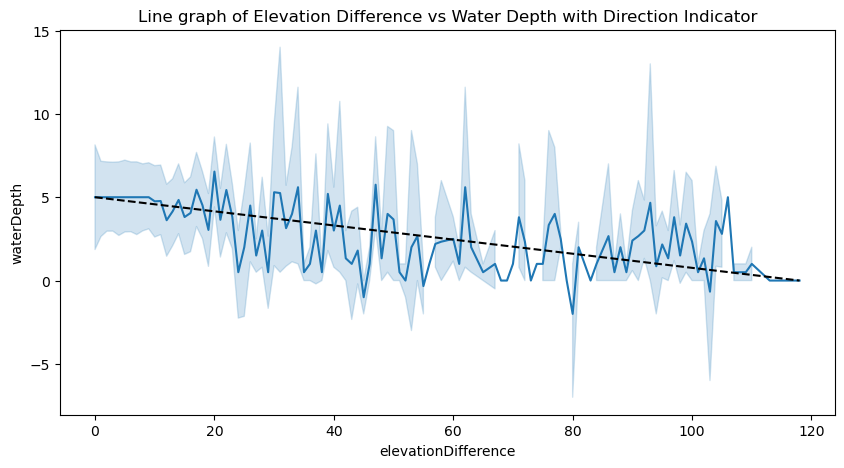

In [89]:
# Sorting the data by 'elevationDifference' might be a good idea if it isn't already sorted
df_visuals = df_visuals.sort_values(by='elevationDifference')

# Calculate the mean waterDepth for the first and last elevationDifference
first_elevation = df_visuals['elevationDifference'].iloc[0]
last_elevation = df_visuals['elevationDifference'].iloc[-1]

first_mean_depth = df_visuals[df_visuals['elevationDifference'] == first_elevation]['waterDepth'].mean()
last_mean_depth = df_visuals[df_visuals['elevationDifference'] == last_elevation]['waterDepth'].mean()

# Line graph
plt.figure(figsize=(10, 5))

# Plot the actual data with sns.lineplot
sns.lineplot(data=df_visuals, x='elevationDifference', y='waterDepth')

# Draw a straight, dotted line connecting the means, with color set to light blue
plt.plot([first_elevation, last_elevation], [first_mean_depth, last_mean_depth], linestyle='--', color='black')

plt.title('Line graph of Elevation Difference vs Water Depth')
plt.show()

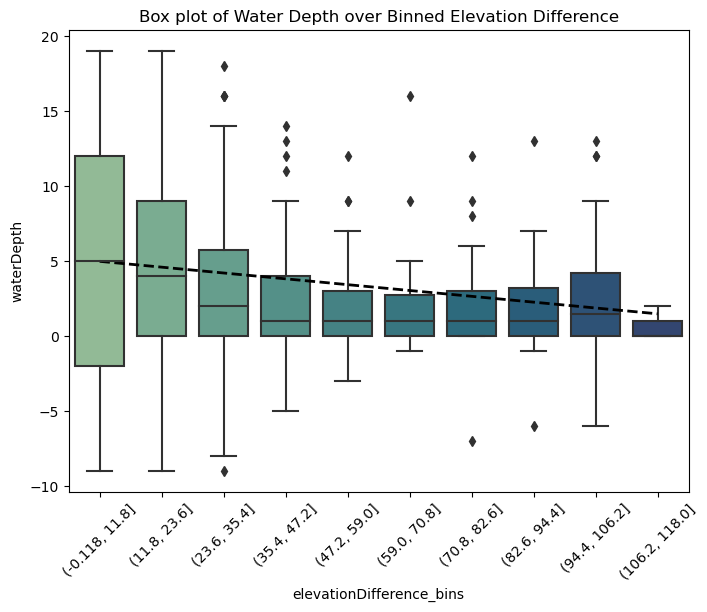

In [97]:
# Bin the elevationDifference with 8 bins
bins = pd.cut(df_visuals['elevationDifference'], bins=8)
df_visuals['elevationDifference_bins'] = bins.astype(str)

# Calculate medians of waterDepth for each bin
medians = df_visuals.groupby('elevationDifference_bins')['waterDepth'].median()

# Box plot with custom color palette
plt.figure(figsize=(8, 6))
sns.boxplot(x='elevationDifference_bins', y='waterDepth', data=df_visuals, palette='crest')
plt.xticks(rotation=45)  # Rotate the bin labels for better readability

# Add direction line connecting medians of the first and last bins
first_median = medians.iloc[0]
last_median = medians.iloc[-1]
plt.plot([0, len(medians)-1], [first_median, last_median], linestyle='--', color='black', lw=2)

plt.title('Box plot of Water Depth over Binned Elevation Difference')
plt.show()

WaterDepth Outliers

In [8]:
df['waterDepth'].describe()

count    2.366780e+06
mean     4.233036e+00
std      1.622507e+01
min     -9.990000e+02
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.990000e+02
Name: waterDepth, dtype: float64

In [9]:
df['asOfDate'].describe()

count                      2584242
unique                      417287
top       2020-01-22T16:55:53.194Z
freq                       1114229
Name: asOfDate, dtype: object

In [13]:
print("First Date of Loss:", df['dateOfLoss'].min())
print("Last Date of Loss:", df['dateOfLoss'].max())

First Date of Loss: 1978-01-01T00:00:00.000Z
Last Date of Loss: 2023-04-12T00:00:00.000Z


In [14]:
len(df)

2584242

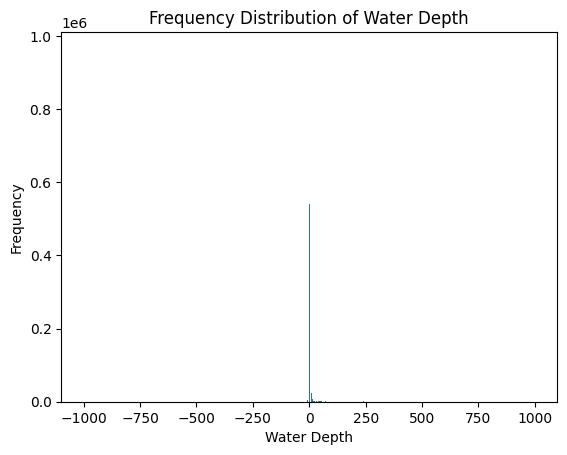

In [ ]:
frequency = df['waterDepth'].value_counts()

# Sort the frequency distribution by the water depth values
frequency_sorted = frequency.sort_index()

# Plot the frequency distribution as a bar graph
plt.bar(frequency_sorted.index, frequency_sorted.values)

# Add labels and title to the graph
plt.xlabel('Water Depth')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Water Depth')

# Display the graph
plt.show()

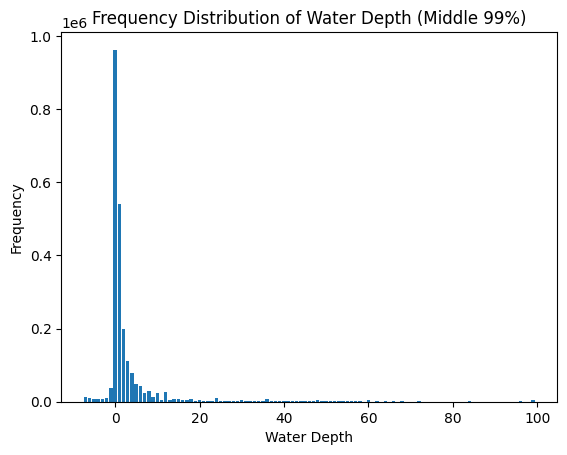

Number of Outliers Removed: 17009
Number of Observations Retained: 2349771


In [ ]:
# Access the 'waterDepth' column from the DataFrame
water_depth = df['waterDepth']

# Calculate the lower and upper quantiles to remove the top and bottom 5 percent of values
lower_quantile = water_depth.quantile(0.005)
upper_quantile = water_depth.quantile(0.995)

# Identify the outliers
outliers = water_depth[(water_depth < lower_quantile) | (water_depth > upper_quantile)]

# Exclude the outliers and keep the non-outlier observations
water_depth_retained = water_depth[(water_depth >= lower_quantile) & (water_depth <= upper_quantile)]

# Count the number of outliers removed
num_outliers_removed = len(outliers)
num_observations_retained = len(water_depth_retained)

# Create a frequency distribution of the water depth values without outliers
frequency = water_depth_retained.value_counts()

# Sort the frequency distribution by the water depth values
frequency_sorted = frequency.sort_index()

# Plot the frequency distribution as a bar graph
plt.bar(frequency_sorted.index, frequency_sorted.values)

# Add labels and title to the graph
plt.xlabel('Water Depth')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Water Depth (Middle 99%)')

# Display the graph
plt.show()

# Print the number of outliers removed and the number of observations retained
print("Number of Outliers Removed:", num_outliers_removed)
print("Number of Observations Retained:", num_observations_retained)

Looking into Named floods...

In [ ]:
df['floodEvent'].describe()
df['floodEvent'].value_counts()

Flooding                             357614
Hurricane Katrina                    208348
Hurricane Sandy                      144847
Hurricane Harvey                      92394
Hurricane Irene                       73685
                                      ...  
Tennessee Flash Flooding                  5
Colorado Burn Scar Flash Flooding         3
Las Vegas Flash Flooding                  2
Arizona Burn Scar Flash Flooding          1
Death Valley Flash Floods                 1
Name: floodEvent, Length: 151, dtype: int64

In [ ]:
print(len(df))
print(df['floodEvent'].isna().sum())
print(df['contentsDamageAmount'].isna().sum())
print(df['buildingDamageAmount'].isna().sum())

2584242
746138
1532525
584636


In [ ]:
subset_df = df[df['floodEvent'].notna()]
subset_df['contentsDamageAmount'].describe()

count    8.104270e+05
mean     2.039461e+04
std      6.248279e+04
min      0.000000e+00
25%      2.090000e+03
50%      7.556000e+03
75%      2.302850e+04
max      9.805102e+06
Name: contentsDamageAmount, dtype: float64

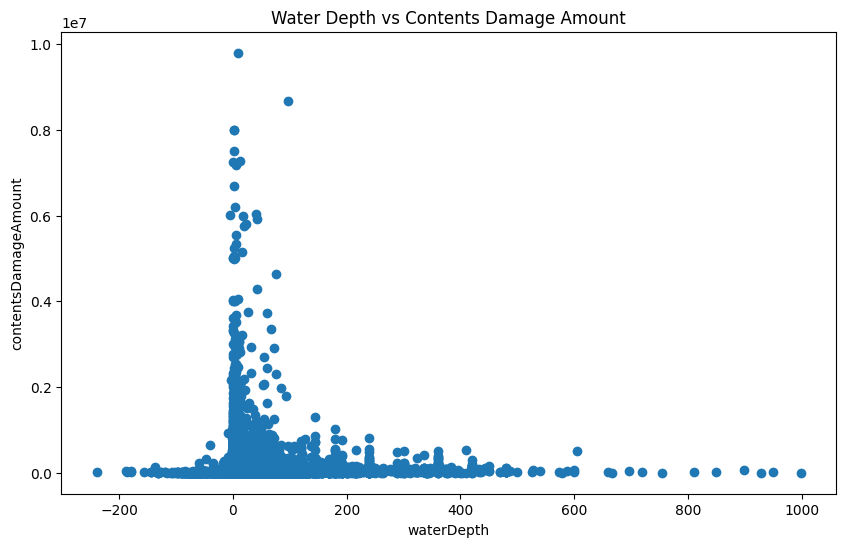

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(subset_df['waterDepth'], subset_df['contentsDamageAmount'])
plt.xlabel('waterDepth')
plt.ylabel('contentsDamageAmount')
plt.title('Water Depth vs Contents Damage Amount')
plt.show()

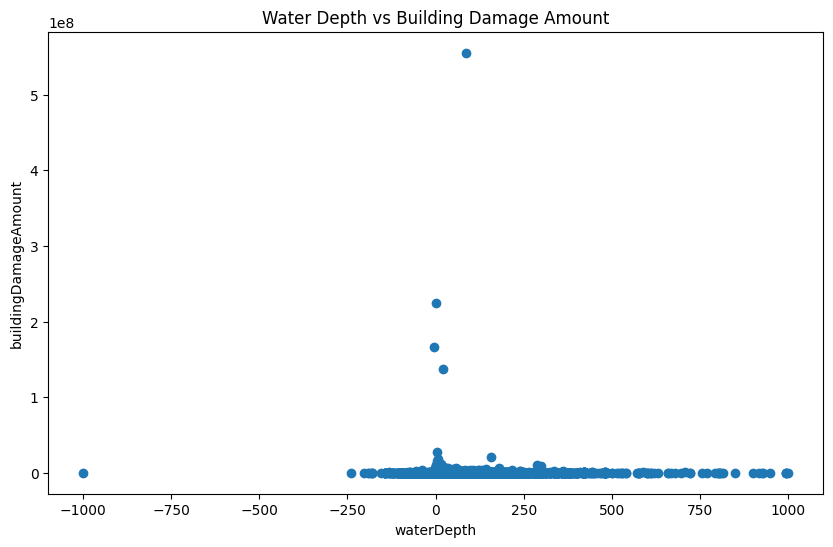

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(subset_df['waterDepth'], subset_df['buildingDamageAmount'])
plt.xlabel('waterDepth')
plt.ylabel('buildingDamageAmount')
plt.title('Water Depth vs Building Damage Amount')
plt.show()

New insights into US flood vulnerability FIG 1:

Fig 1 looks at 'Relative Damage (%)'. Lets find a way to get that variable...

In [ ]:
# Assuming you have a DataFrame named 'df' with columns 'buildingDamageAmount' and 'buildingPropertyValue'
count_greater = (df['buildingDamageAmount'] > df['buildingPropertyValue']).sum()
count_greater1 = (df['netBuildingPaymentAmount'] > df['buildingPropertyValue']).sum()
count_greater2 = (df['totalBuildingInsuranceCoverage'] > df['buildingPropertyValue']).sum()

print("Number of times 'buildingDamageAmount' is greater than 'buildingPropertyValue':", count_greater)
print("Number of times 'netBuildingPaymentAmount' is greater than 'buildingPropertyValue':", count_greater1)
print("Number of times 'totalBuildingInsuranceCoverage' is greater than 'buildingPropertyValue':", count_greater2)

Number of times 'buildingDamageAmount' is greater than 'buildingPropertyValue': 7337
Number of times 'netBuildingPaymentAmount' is greater than 'buildingPropertyValue': 12972
Number of times 'totalBuildingInsuranceCoverage' is greater than 'buildingPropertyValue': 817865


In [ ]:
print(df['buildingDamageAmount'].describe())
print(df['buildingPropertyValue'].describe())

count    1.999606e+06
mean     3.588269e+04
std      8.194523e+05
min      0.000000e+00
25%      3.413000e+03
50%      1.106800e+04
75%      3.962200e+04
max      9.277000e+08
Name: buildingDamageAmount, dtype: float64
count    1.999606e+06
mean     7.268628e+06
std      2.017628e+08
min      0.000000e+00
25%      6.007425e+04
50%      1.086610e+05
75%      1.871620e+05
max      9.950000e+09
Name: buildingPropertyValue, dtype: float64


In [ ]:
df['relativeDamage'] = df['buildingDamageAmount']/df['buildingPropertyValue']

In [ ]:
df['relativeDamage'].describe()

count    1.988928e+06
mean              inf
std               NaN
min      0.000000e+00
25%      3.613412e-02
50%      1.164329e-01
75%      3.655940e-01
max               inf
Name: relativeDamage, dtype: float64

Fig 1 only looks at 1 story no basement homes...

In [ ]:
print(df['basementEnclosureCrawlspaceType'].value_counts())
print(df['numberOfFloorsInTheInsuredBuilding'].value_counts())

2.0    279605
0.0    227277
1.0    215825
4.0     43136
Name: basementEnclosureCrawlspaceType, dtype: int64
1.0    1320981
2.0     803877
3.0     365468
5.0      38977
4.0      36733
6.0        961
Name: numberOfFloorsInTheInsuredBuilding, dtype: int64


In [ ]:
print(len(df[df['waterDepth'] > 0]))



1299601


In [154]:
df['basementEnclosureCrawlspaceType'].describe() # 0 - None; 1 - Finished Basement/Enclosure; 2 - Unfinished Basement/Enclosure; 3 - Crawlspace; 4 - Subgrade Crawlspace
df['numberOfFloorsInTheInsuredBuilding'].describe() # 1 = One floor; 2= Two floors; 3 = Three or more floors; 4 = Split-level; 5 = Manufactured (mobile) home or travel trailer on foundation; 6 = Townhouse/Rowhouse with three or more floors
fig1_df = df[((df['occupancyType'] == 1) | (df['occupancyType'] == 2) | (df['occupancyType'] == 3) | (df['occupancyType'] == 11) | (df['occupancyType'] == 12) | (df['occupancyType'] == 13) | (df['occupancyType'] == 14) | (df['occupancyType'] == 15) | (df['occupancyType'] == 16)) & (df['numberOfFloorsInTheInsuredBuilding'] == 1) & (df['waterDepth'] >=0)]


In [155]:
len(fig1_df)

1067441

In [156]:
len(fig1_df[fig1_df['dateOfLoss'] < '2015-01-01'])

847686

In [ ]:
print(len(fig1_df))
print(fig1_df['buildingDamageAmount'].describe())
print(fig1_df['buildingPropertyValue'].describe())
print(fig1_df['buildingPropertyValue'].isna().sum())
print((fig1_df['buildingPropertyValue'] == 0).sum())

1002126
count    7.714710e+05
mean     3.738480e+04
std      3.210483e+05
min      0.000000e+00
25%      3.662000e+03
50%      1.326200e+04
75%      5.015300e+04
max      1.471300e+08
Name: buildingDamageAmount, dtype: float64
count    7.714710e+05
mean     5.559307e+06
std      1.788271e+08
min      0.000000e+00
25%      5.341050e+04
50%      9.424200e+04
75%      1.535400e+05
max      9.784320e+09
Name: buildingPropertyValue, dtype: float64
230655
8819


Fig 1 without dealing with inch feet problem...

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4529: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4530: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpola

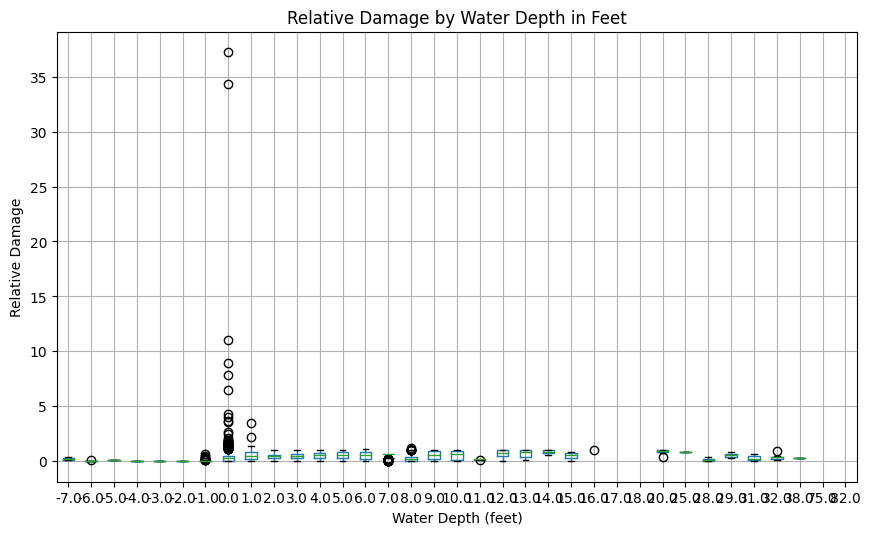

In [ ]:
# Convert waterDepth from inches to feet and round to nearest foot
fig1_df = fig1_df.copy()
fig1_df['waterDepth_feet'] = (fig1_df['waterDepth'] / 12).round(0)

# Create boxplots
fig, ax = plt.subplots(figsize=(10,6))

fig1_df.boxplot(column='relativeDamage', by='waterDepth_feet', ax=ax)

plt.title('Relative Damage by Water Depth in Feet')
plt.suptitle('')  # Suppress default title
plt.xlabel('Water Depth (feet)')
plt.ylabel('Relative Damage')

plt.show()

Now to deal with the inch and feet record issue...

In [ ]:
#Visual inspection
# Convert asOfDate to datetime if not already
df['asOfDate'] = pd.to_datetime(df['asOfDate'])

plt.figure(figsize=(10,6))
plt.scatter(df['asOfDate'], df['waterDepth'])
plt.title('Water Depth Over Time')
plt.xlabel('Date')
plt.ylabel('Water Depth')
plt.show()
